# Лабораторная работа №2

## Коновалов И.А. М19-АЭ

In [1]:
## Вариант №4

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
rain1_df=pd.read_csv('rainfall in india 1901-2015.csv')
rain1_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


### 1. Постройте графики количества осадков по годам в разных штатах. Сделайте выводы по построенным графикам.

In [3]:
gr1_df =rain1_df[["SUBDIVISION","YEAR","ANNUAL"]]
columnsTitles=["YEAR","ANNUAL", 'SUBDIVISION']
df=gr1_df.reindex(columns=columnsTitles)
m=df
m

,YEAR,ANNUAL,SUBDIVISION
0,1901,3373.2,ANDAMAN & NICOBAR ISLANDS
1,1902,3520.7,ANDAMAN & NICOBAR ISLANDS
2,1903,2957.4,ANDAMAN & NICOBAR ISLANDS
3,1904,3079.6,ANDAMAN & NICOBAR ISLANDS
4,1905,2566.7,ANDAMAN & NICOBAR ISLANDS
...,...,...,...
4111,2011,1533.7,LAKSHADWEEP
4112,2012,1405.5,LAKSHADWEEP
4113,2013,1426.3,LAKSHADWEEP
4114,2014,1395.0,LAKSHADWEEP


Text(0, 0.5, 'Annual')

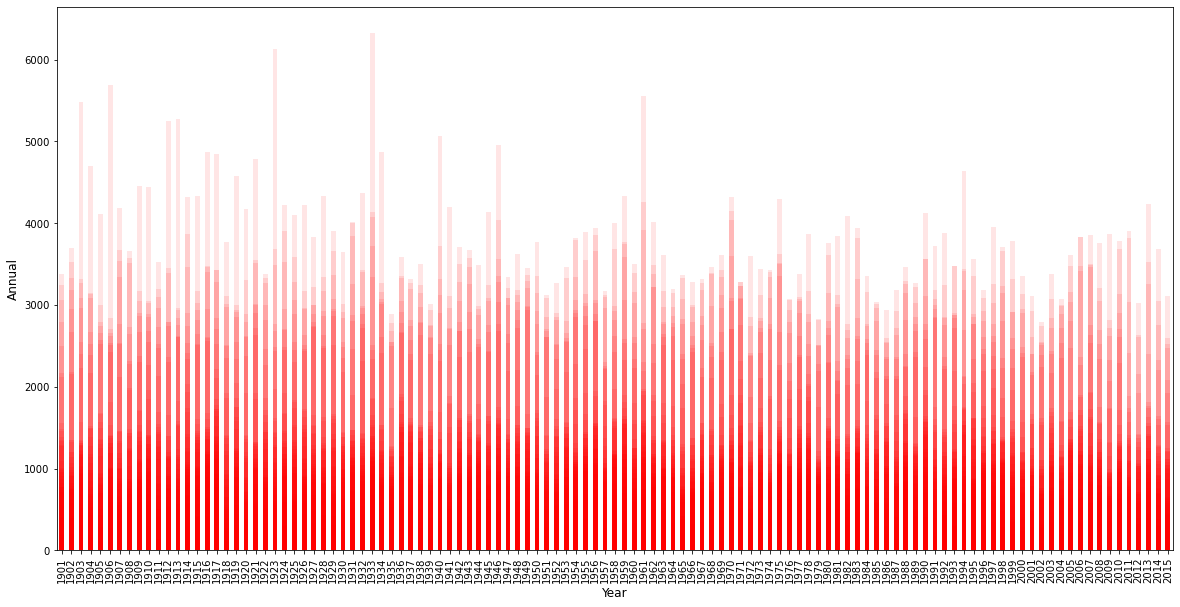

In [4]:
fig, ax = plt.subplots()
(m.groupby(by='SUBDIVISION')
 .plot(kind='bar', stacked='true',color ='r', alpha=0.1, figsize=(20, 10), legend= False, fontsize=10, ax=ax, x='YEAR', y='ANNUAL')
)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Annual', fontsize=12)

#### По данному графику можно сделать следующие выводы:
- Наибольшнее колличество осадков выпало в 1933 году в штате ARUNACHAL PRADESH;
- Наименьшее колличество осадков выпало в 1988 году в штате HARYANA SAURASHTRA & KUTCH;
- Суммарное колличество осадков во второй половине исследуемого временного отрезка меньше, чем в первой его половине

### 2. Постройте графики количества осадков по месяцам по всем годам кумулятивно. Сделайте выводы по построенным графикам.

In [5]:
gr2 = rain1_df.groupby(by='YEAR').sum()[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
gr2

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,1232.7,1417.8,738.4,1623.6,2465.2,6811.3,10192.3,10546.4,4695.4,2579.4,2266.5,378.3
1902,298.2,290.7,733.3,1602.0,2521.4,5908.7,12290.1,8393.0,9051.4,3035.0,1521.0,1160.3
1903,589.8,502.0,930.2,594.1,2808.3,6019.6,12673.8,10481.9,7581.7,4387.1,1649.8,758.6
1904,409.4,328.7,1010.8,1449.1,3235.9,8312.0,10919.0,7595.5,5859.1,2959.3,691.5,517.0
1905,812.0,716.7,1432.9,1216.4,2675.3,5768.2,10091.0,8637.3,6274.1,2735.9,560.9,595.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,516.3,819.7,998.8,1775.7,2576.2,8679.7,11329.6,11858.1,8128.4,1923.3,1074.9,465.5
2012,962.0,347.9,428.1,2096.7,1808.8,6599.1,10632.5,10674.2,8453.1,2758.6,1395.2,487.4
2013,435.9,1316.3,629.2,1137.6,2980.9,10707.1,13412.4,9516.2,6452.9,5213.3,986.1,317.5


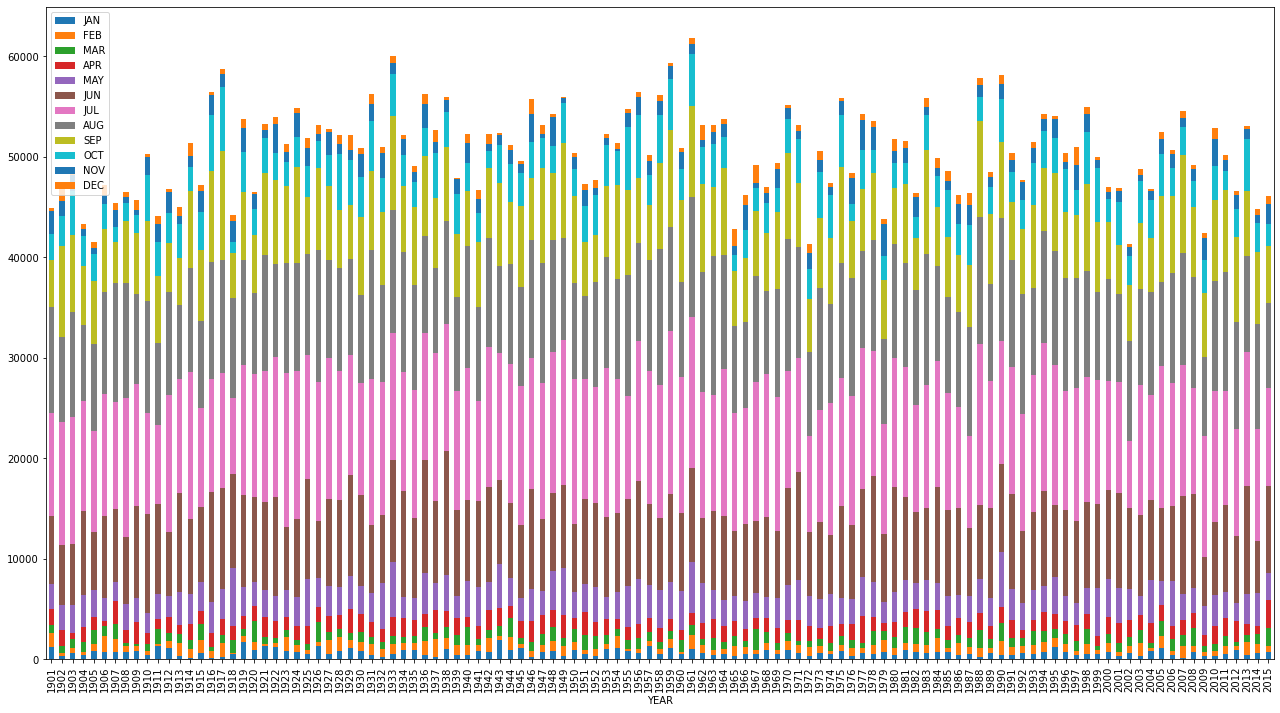

In [6]:
gr2.plot(kind='bar', stacked='true', figsize=(22,12))
plt.show()

#### По данному графику можно сделать следующие выводы:
- Наибольшее колличесво осадков выпадало в июле;
- В летнее время выпало наибольшее колличество осадков;
- Наименьшее колличесво осадков выпало в январе и феврале;
- Наибольшее суммарное колличество осадков выпало в 1961 году;
- Наименьшее суммарное колличество осадков выпало в 1972 году.

### 3. Постройте графики количества осадков по штатам, используйте boxplot. Сделайте выводы по построенным графикам.

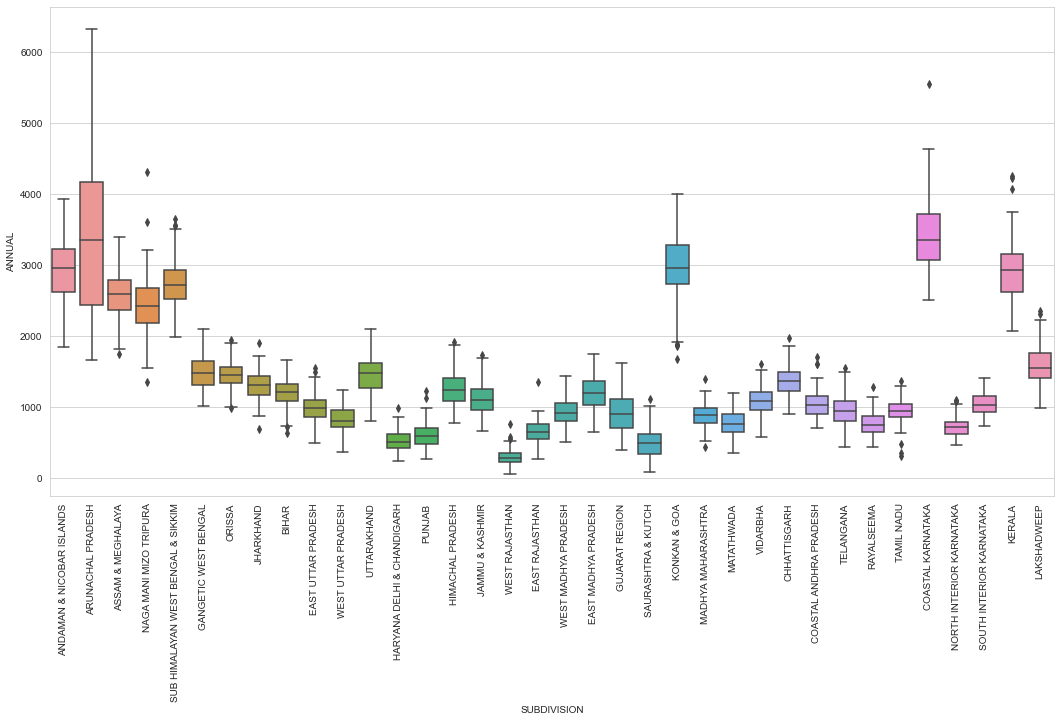

In [7]:
import seaborn as sns
sns.set_style('whitegrid')
fig = plt.figure(figsize=(18, 9))
plt.xticks(rotation='vertical')
sns.boxplot(x='SUBDIVISION', y='ANNUAL', data=rain1_df)

#### По данному графику можно сделать следующие выводы:
- Осадки в штате ARUNACHAL PRADESH имеют больший диапазон по сравнению с другими штатами;
- Самый низкий уровень осадков наблюдается в WEST RAJASTHAN с очень низкими отклонениями, по сравнению с другими штатами;
- Самые большие отклонения (выбросы) наблюдаются в COASTAL KARNATAKA.

### 4. Определите штаты, для которых количество осадков минимально и максимально.

In [8]:
osadki = rain1_df.groupby(by='SUBDIVISION').sum()[['ANNUAL']].sort_values(by='ANNUAL', ascending=False)
osadki

,ANNUAL
SUBDIVISION,
COASTAL KARNATAKA,388558.7
KONKAN & GOA,342433.9
KERALA,336431.1
SUB HIMALAYAN WEST BENGAL & SIKKIM,316505.0
ARUNACHAL PRADESH,311116.0
ANDAMAN & NICOBAR ISLANDS,304453.7
ASSAM & MEGHALAYA,296780.0
NAGA MANI MIZO TRIPURA,279866.2
GANGETIC WEST BENGAL,171406.1


In [9]:
hig = osadki.index.values[0]
low = osadki.index.values[-1]
print ('Наибольшее колличество осадков: ', hig)
print ('Наименьшее колличество осадков: ', low)

Наибольшее колличество осадков:  COASTAL KARNATAKA
Наименьшее колличество осадков:  WEST RAJASTHAN


### 5. Выведите уникальные имена штатов и территорий Индии.

In [10]:
uniq = rain1_df['SUBDIVISION'].unique()
print(uniq)
print ('Всего названий: ', len(uniq))

['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']
Всего названий:  36


### 6. Определите количество лет наблюдений для каждого штата.

In [11]:
nab1_df =rain1_df.groupby(['SUBDIVISION'])['YEAR'].count()
nab1_df= nab1_df.reset_index()
nab1_df

,SUBDIVISION,YEAR
0,ANDAMAN & NICOBAR ISLANDS,110
1,ARUNACHAL PRADESH,97
2,ASSAM & MEGHALAYA,115
3,BIHAR,115
4,CHHATTISGARH,115
5,COASTAL ANDHRA PRADESH,115
6,COASTAL KARNATAKA,115
7,EAST MADHYA PRADESH,115
8,EAST RAJASTHAN,115
9,EAST UTTAR PRADESH,115


### 7. Определите штат с наименьшим количеством наблюдений

In [12]:
nab1_df[nab1_df["YEAR"] == nab1_df["YEAR"].min()]

,SUBDIVISION,YEAR
1,ARUNACHAL PRADESH,97


### 8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [13]:
rain1_df["Jan-Dec"]=rain1_df["DEC"]+rain1_df["JAN"]
rain1_df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Jan-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,82.8
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,160.5
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,237.7
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,49.5
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6,20.0
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1,28.0
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6,52.9
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5,115.5


### 9. Вычислите корреляцию Пирсона и Спирмена между признаками NOV и MAR. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [14]:
rain2_df=pd.read_csv('district wise rainfall normal.csv')
rain2_df.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [15]:
corr=rain2_df[["MAR","NOV"]]
corr

,MAR,NOV
0,65.2,315.2
1,18.6,275.8
2,8.6,198.6
3,176.4,34.1
4,105.9,29.5
...,...,...
636,43.6,172.9
637,8.4,84.6
638,73.9,213.5
639,17.5,93.6


In [16]:
from scipy import stats

In [17]:
a = stats.pearsonr(corr['MAR'],corr['NOV']) #корреляция Пирсона
print(a)

(0.10906609663702337, 0.0057063698134176555)


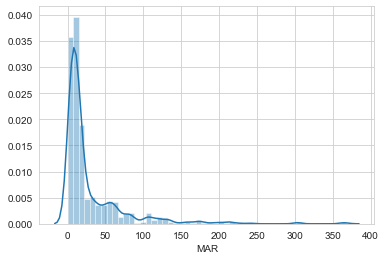

In [18]:
sns.distplot(corr['MAR'])

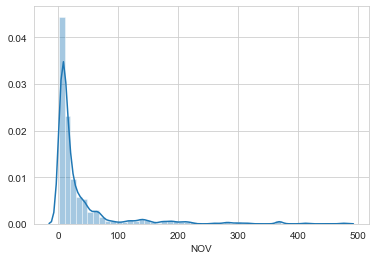

In [19]:
sns.distplot(corr['NOV'])

In [20]:
b = stats.spearmanr(corr['MAR'],corr['NOV']) #корреляция Спирмена
print(b)

SpearmanrResult(correlation=0.3755107787885492, pvalue=6.75820317828288e-23)


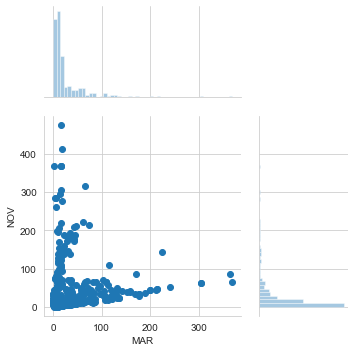

In [22]:
 sns.jointplot(data= corr,
    x= 'MAR', y= 'NOV', height=5, ratio=2)